In [1]:
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook 
import numpy as np
import glob
import h5py as h5
import pandas as pd
import tqdm

In [2]:
font = {
        'size'   : 28
}
matplotlib.rc('font', **font)

In [3]:
mod02_root = '/data/keeling/a/jdnied2/c/MOD02/ML/'
files = glob.glob(f'{mod02_root}/MOD02QKM_MLData_Shape_256x256_*.hdf')
files

['/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2010166.1435_Image_097.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2010054.1435_Image_075.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2005104.1435_Image_086.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2016199.1435_Image_134.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2010054.1435_Image_008.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2015260.1430_Image_104.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2010054.1435_Image_046.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2005104.1435_Image_040.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2018236.1435_Image_070.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD02QKM_MLData_Shape_256x256_2011169.1425_Image_000.hdf',
 '/data/keeling/a/jdnied2/c/MOD02/ML/MOD

In [4]:
# https://stackoverflow.com/questions/42463172/how-to-perform-max-mean-pooling-on-a-2d-array-using-numpy
def max_pool(x):
    M,N = x.shape
    K = 2
    L = 2
    MK = M // K
    NL = N // L
    return x[:MK*K, :NL*L].reshape(MK, K, NL, L).max(axis=(1, 3))

In [5]:
def mean_pool(x):
    M,N = x.shape
    K = 2
    L = 2
    MK = M // K
    NL = N // L
    return x[:MK*K, :NL*L].reshape(MK, K, NL, L).mean(axis=(1, 3))

/tmp/ipykernel_48629/3857234320.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5.File(files[6]) # 3 5 6 12


<IPython.core.display.Javascript object>


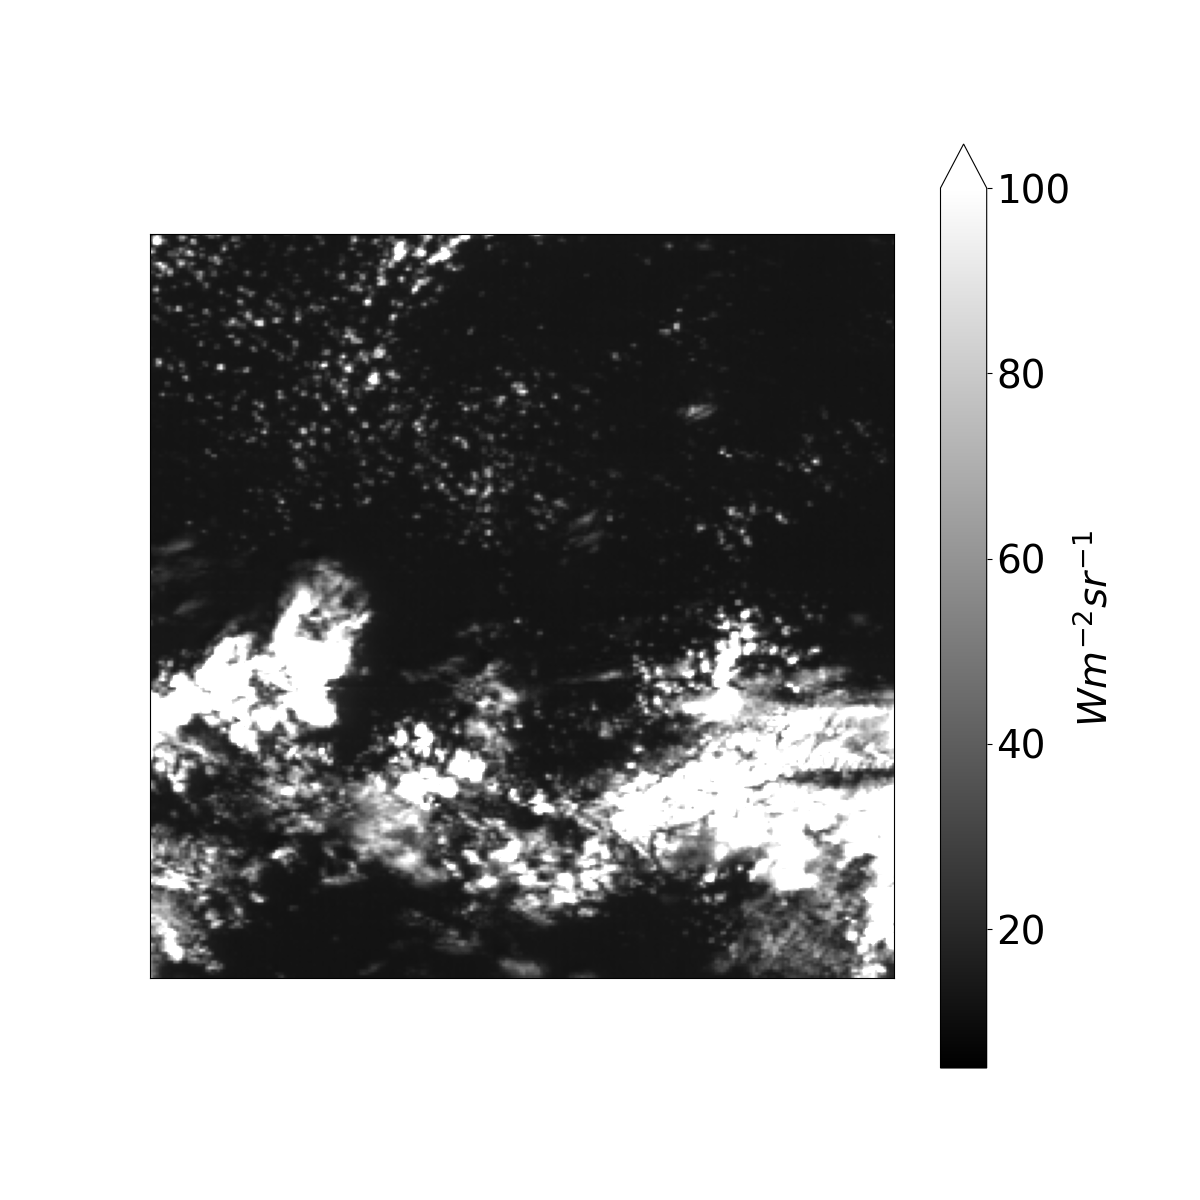

In [6]:
# just for the colorbar
f1 = h5.File(files[6]) # 3 5 6 12
x = np.array(f1['Band_1.0'])
num_of_pools = 1
fig, ax = plt.subplots(1,1, figsize=(12,12))
for i in range(num_of_pools):
    im = ax.imshow(x, cmap='gray', vmax=100, vmin=5)
    x = mean_pool(x)
    ax.set_xticks([])
    ax.set_yticks([])

    res = f'{np.abs(i*750 - 250)} m'
    plt.colorbar(im, extend='max',
                 label=r'$Wm^{-2} sr^{-1}$')
    plt.savefig('/data/keeling/a/jdnied2/c/MS_THESIS/Support_Figs/colorbar_mean_pool.png')

/tmp/ipykernel_158009/4140035059.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f1 = h5.File(files[6]) # 3 5 6 12


<IPython.core.display.Javascript object>


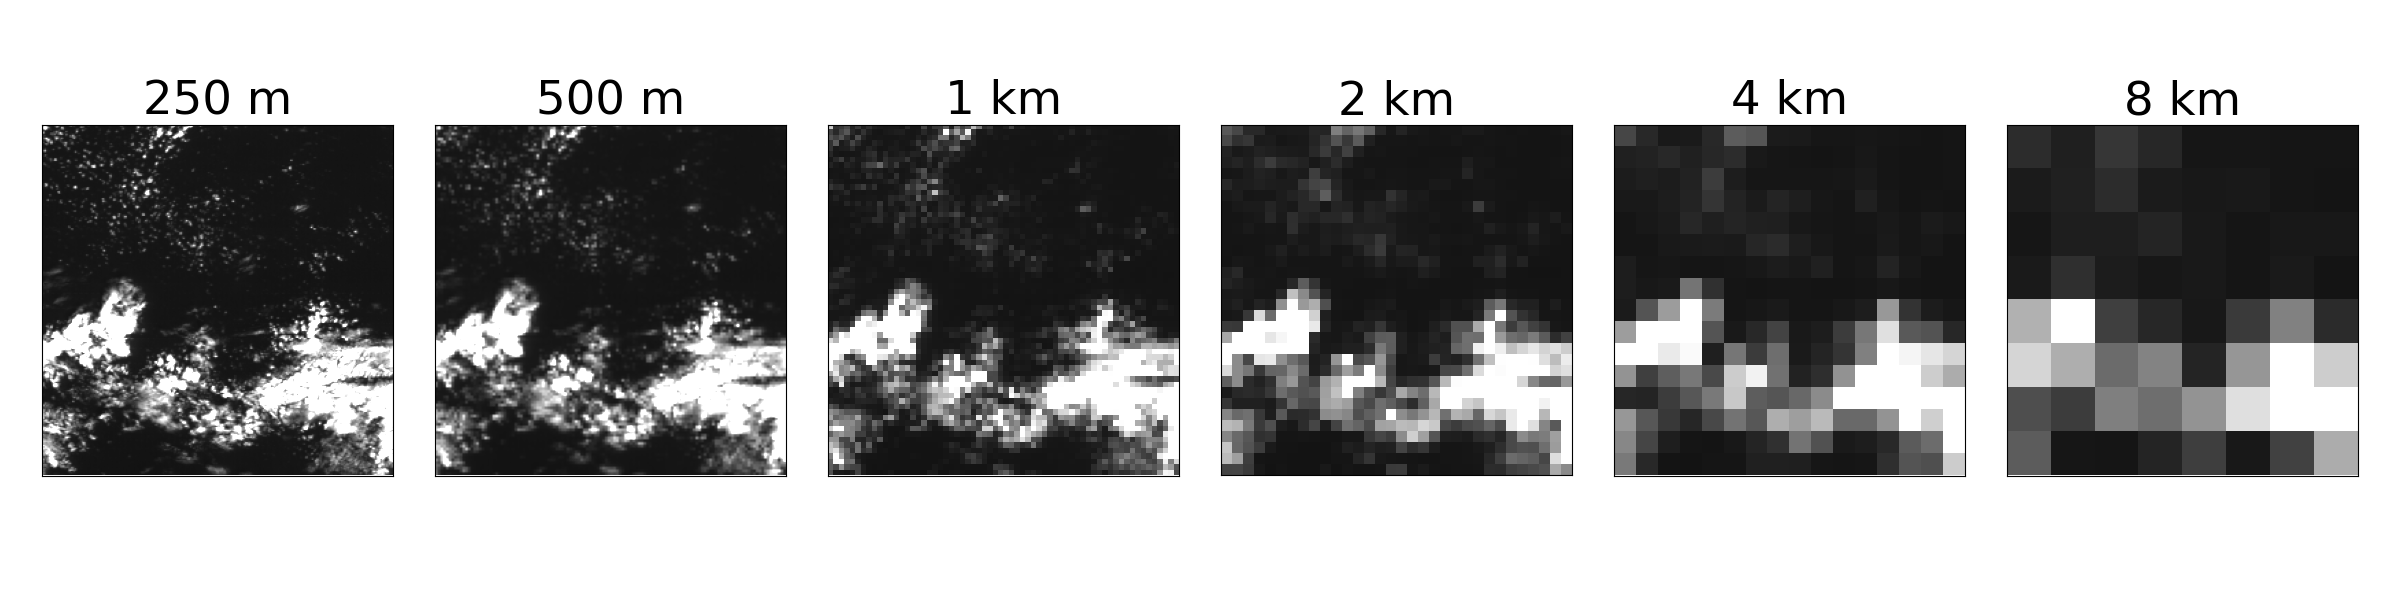

In [94]:
f1 = h5.File(files[6]) # 3 5 6 12
x = np.array(f1['Band_1.0'])
num_of_pools = 6
fig, ax = plt.subplots(1,num_of_pools, figsize=(24,6))
for i in range(num_of_pools):
    ax[i].imshow(x, cmap='gray', vmax=100, vmin=5)
    x = mean_pool(x)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if i < 2:
        res = f'{np.abs(i*750 - 250)} m'
    else:
        res = f'{2**(i-2)} km'
    ax[i].set_title(res)
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/MS_THESIS/Support_Figs/mean_pool.png')

In [ ]:
x = np.linspace(-10, 10, 100)

# Calculate the ReLU and sigmoid activation functions
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))

fig,ax = plt.subplots(1,1,figsize=(8,8))

# Plot the activation functions
# plt.plot(x, relu, label='ReLU')
plt.plot(x, sigmoid)

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Activation')
plt.text(-15, 1.2, 'B', fontsize=40, fontweight="bold", va="top", ha="left")
plt.tight_layout()
plt.savefig('/data/keeling/a/jdnied2/c/MS_THESIS/Support_Figs/sig.png')